In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
from matplotlib import rc
import sympy as sym

# Punto 1: Ecuación diferencial no lineal

In [2]:
#Ecuación diferencial

def System(t,r): 
    
    return r**q

#Soluciones a la ecaución diferencial

def solution_a(t): 
    
    return np.exp(t)

def solution_b(t): 
    
    return (t*(1-q)+1)**(1/(1-q))

In [3]:
#Discretización

N = 500   
t = np.linspace(0,10,N+1)    

#Condiciones iniciales

r0 = np.array([1])

In [4]:
#Valores de q para los cuales se quiere calcular la solución

Q = [0.,0.2,0.4,0.7,0.9,1.]

#Cálculo de soluciones tanto analíticas como numéricas

sol_num = []

sol_an = []

for q in Q: 
    
    if q == 0.:
        
        sol1 = solution_b(t)
        
        sol_an.append(sol1)
    
        solution = solve_ivp(System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45') 
        
        sol_num.append(solution)
    
    elif q == 1.:
    
        sol1 = solution_a(t)
        
        sol_an.append(sol1)
        
        solution = solve_ivp(System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45') 
        
        sol_num.append(solution)
    
    else:
        
        sol1 = solution_b(t)
        
        sol_an.append(sol1)
    
        solution = solve_ivp(System, (t[0],t[-1]), r0, t_eval = t, method = 'RK45') 
        
        sol_num.append(solution)


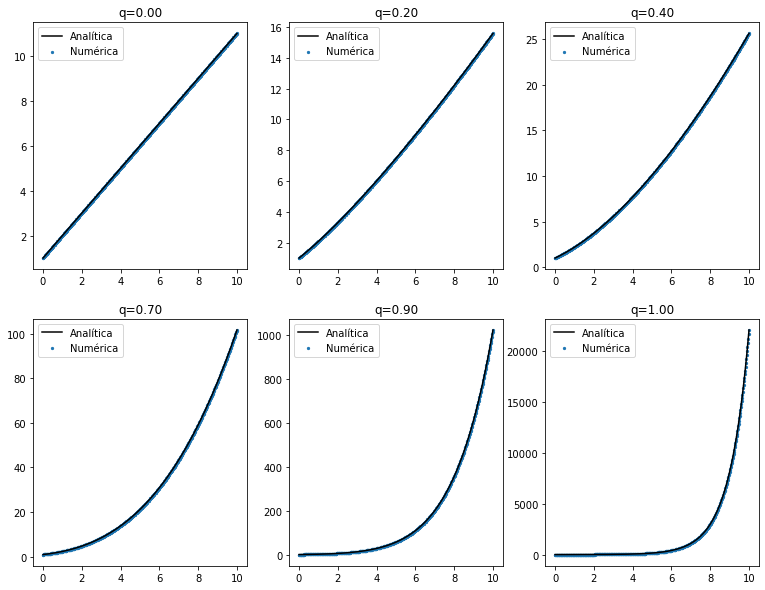

In [5]:
#Gráfica de las soluciones

plt.figure(figsize=(13,10))

plt.subplot(2,3,1)

plt.scatter(t,sol_num[0].y[0], label='Numérica', s=5)
plt.plot(t,sol_an[0], label='Analítica', c='k')
plt.title('q={:.2f}'.format(0.))
plt.legend()

plt.subplot(2,3,2)

plt.scatter(t,sol_num[1].y[0], label='Numérica', s=5)
plt.plot(t,sol_an[1], label='Analítica', c='k')
plt.title('q={:.2f}'.format(0.2))
plt.legend()

plt.subplot(2,3,3)

plt.scatter(t,sol_num[2].y[0], label='Numérica', s=5)
plt.plot(t,sol_an[2], label='Analítica', c='k')
plt.title('q={:.2f}'.format(0.4))
plt.legend()

plt.subplot(2,3,4)

plt.scatter(t,sol_num[3].y[0], label='Numérica', s=5)
plt.plot(t,sol_an[3], label='Analítica', c='k')
plt.title('q={:.2f}'.format(0.7))
plt.legend()

plt.subplot(2,3,5)

plt.scatter(t,sol_num[4].y[0], label='Numérica', s=5)
plt.plot(t,sol_an[4], label='Analítica', c='k')
plt.title('q={:.2f}'.format(0.9))
plt.legend()

plt.subplot(2,3,6)

plt.scatter(t,sol_num[5].y[0], label='Numérica', s=5)
plt.plot(t,sol_an[5], label='Analítica', c='k')
plt.title('q={:.2f}'.format(1.))
plt.legend()


# Punto 2: Métodos multipaso

### Adams-Bashforth

In [6]:
t = sym.Symbol('t', Real=True)
h = sym.Symbol('h', Real=True)

#Para 3 puntos
F1 = (t-(-h))*(t-(-2*h))/(2*h**2)
F2 = -(t-(0))*(t-(-2*h))/(h**2)
F3 = (t-(-h))*(t-(0))/(2*h**2)

I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print('Los coeficientes del método de Adams-Bashforth de tres puntos son: {}, {}, {}'.format(I1,I2,I3))

Los coeficientes del método de Adams-Bashforth de tres puntos son: 23*h/12, -4*h/3, 5*h/12


In [7]:
#Para 4 puntos
F1 = (t-(-h))*(t-(-2*h))*(t-(-3*h))/(6*h**3)
F2 = -(t-(0))*(t-(-2*h))*(t-(-3*h))/(2*h**3)
F3 = (t-(-h))*(t-(0))*(t-(-3*h))/(2*h**3)
F4 = -(t-(-h))*(t-(-2*h))*(t-(0))/(6*h**3)

I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print('Los coeficientes del método de Adams-Bashforth de cuatro puntos son: {}, {}, {}, {}'.format(I1,I2,I3,I4))

Los coeficientes del método de Adams-Bashforth de cuatro puntos son: 55*h/24, -59*h/24, 37*h/24, -3*h/8


### Adams-Moulton

In [8]:
#Para 3 puntos
F1 = (t-(0))*(t-(-h))/(2*h**2)
F2 = -(t-(h))*(t-(-h))/(h**2)
F3 = (t-(0))*(t-(h))/(2*h**2)

I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
print('Los coeficientes del método de Adams-Moulton de tres puntos son: {}, {}, {}'.format(I1,I2,I3))

Los coeficientes del método de Adams-Moulton de tres puntos son: 5*h/12, 2*h/3, -h/12


In [9]:
#Para 4 puntos
F1 = (t-(0))*(t-(-h))*(t-(-2*h))/(6*h**3)
F2 = -(t-(h))*(t-(-h))*(t-(-2*h))/(2*h**3)
F3 = (t-(0))*(t-(h))*(t-(-2*h))/(2*h**3)
F4 = -(t-(0))*(t-(-h))*(t-(h))/(6*h**3)

I1 = sym.integrate(F1, (t,0,h))
I2 = sym.integrate(F2, (t,0,h))
I3 = sym.integrate(F3, (t,0,h))
I4 = sym.integrate(F4, (t,0,h))
print('Los coeficientes del método de Adams-Moulton de cuatro puntos son: {}, {}, {}, {}'.format(I1,I2,I3,I4))

Los coeficientes del método de Adams-Moulton de cuatro puntos son: 3*h/8, 19*h/24, -5*h/24, h/24


# Punto 3: Gravitational N-Body problem

In [10]:
%matplotlib notebook 
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [11]:
# Definimos la clase particula

class Particle():
    
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt = t[1]-t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros((len(t),len(r0)))
        self.vVector = np.zeros((len(t),len(v0)))
        self.aVector = np.zeros((len(t),len(a0)))
        
        self.L = np.zeros(len(r0))
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        self.MomentumVector = np.zeros((len(t),len(v0)))
        self.AngularMomentumVector = np.zeros( (len(t),len(v0)) )
        self.EpVector = np.zeros((len(t),1))
        self.EkVector = np.zeros((len(t),1))
        
        
        self.Ep = 0.
        self.Force = self.m * self.a         #Esto es en años terrestres
        self.G = 4*np.pi**2
        #self.G = 4*np.pi**2/365.2421**2     #Esto es en días terrestres
        
        # Initial condition
        
        # Esto significa en el pasado
        
        self.rp = r0
        self.vp = v0
                
    def Evolution(self,i):     #La evolución es con el algoritmo de Verlet
                               #Se supone que se puede expandir en Taylor alrededor de t + dt y t - dt
                               #Se obtiene x en términos del presente y el pasado
                               #Es un método simplético, va a conservar la energía. 
                               #Requiere al menos un starter, se hace con un Euler
                
        # fill vectors
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        self.SetMomentum(i,self.m*self.v)
        
        
        # Energy 
        
        self.SetEk(i,self.GetKineticEnergy())
        self.SetEp(i,self.GetPotentialEnergy())
        
        # Change variables using the verlet method
        
        self.a = self.Force/self.m
        
     
        if i == 0:        #Actualiza con Euler para obtener un primer paso
            
            self.rp = self.r
            self.r = self.rp + self.dt * self.v
        
        else:              
            
            self.rf = 2*self.r - self.rp + self.a * self.dt**2         #Posición futura
            self.v = ( self.rf - self.rp ) / (2*self.dt)               #Velocidad con derivada central
            
            self.rp = self.r                #Pasado lo vuelve el presente
            self.r = self.rf                #Presente lo vuelve el futuro
            
    def ResetForce(self):
        
        self.Force[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.  
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v   
        
    def SetMomentum(self,i,p):
        self.MomentumVector[i] = p
        
    def SetAngularMomentum(self,i,r,p):
        
    
        self.L[0] = r[1]*p[2] - r[2]*p[1]
        self.L[1] = -(r[0]*p[2] - r[2]*p[0])
        self.L[2] = r[0]*p[1] - r[1]*p[0]
        
        self.AngularMomentumVector[i] = self.L
            
    def SetEk(self,i,Ek):
        self.EkVector[i] = Ek
    
    def SetEp(self,i,Ep):
        self.EpVector[i] = Ep

    
    # Getters
    
    def GetForce(self,p):              #Problema gravitacional
        
        d = np.linalg.norm( self.r - p.GetPosition() )
        
        Fn = - self.G * self.m * p.m / (d**2 + 0.1**2)**(3/2)        #Epsilon se agrega para suavizar, da un valor no infinito de fuerza     
        
        self.Force = np.add( self.Force, Fn* (self.r - p.GetPosition())  )
        
        self.Ep += - self.G * self.m * p.m / (d**2 + 0.1**2)**(1/2)      #Como fuerza es conservativa, se le asocia una energía potencial
                
    def GetPosition(self):
        return self.r
    
    def GetPositionVector(self):
        return self.rVector
    
    def GetReducePosition(self):
        return self.RrVector
        
    def GetVelocityVector(self):
        return self.vVector    
    
    def GetMomentumVector(self):
        return self.MomentumVector
    
    def GetAngularMomentumVector(self):
        return self.AngularMomentumVector
        
    def GetReduceVelocity(self):
        return self.RvVector
     
    def GetKineticEnergy(self):
        return 0.5*self.m*np.linalg.norm(self.v)**2
    
    def GetPotentialEnergy(self):
        #return -np.dot( self.m*self.a, self.r )
        return 0.5*self.Ep        #Retorna la mitad para no contar doble
   
    def GetNetForce(self):
        return self.Force

    def GetR(self):
        return self.radius
  
    # Reducing size

    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                
        self.RvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [12]:
#Generador de puntos sobre esfera

def Posicion(N):
    
    X = []
    Y = []
    Z = []
    
    u = np.random.uniform(-1, 1, (N))
    v = np.random.uniform(-1, 1, (N))
    
    g = np.array((u**2 + v**2) < 1) + 0
    
    index = np.argwhere(g>=1)
    
    for i in index:
        
        a, b = u[i], v[i]
        x = 2 * a * np.sqrt(1 - (a**2 + b**2))
        y = 2 * b * np.sqrt(1 - (a**2 + b**2))
        z = 1 - 2 * (a**2 + b**2)
        X.append(x)
        Y.append(y)
        Z.append(z)
        
    x = X
    y = Y
    z = Z
    
    p = []

    for i in range(len(x)):

        q = np.array([float(x[i]),float(y[i]),float(z[i])])

        a = np.linalg.norm(q)

        p.append(q)
        
    return p

In [13]:
def GetParticles(NParticles, Limit, Velo, Dim = 3, dt = 0.1):      #Genera las partículas
    
    Particles_ = []
    
    x = Posicion(NParticles + 300)
    
    for i in range(NParticles):
        
        x0 = x[i] #genera posiciones aleatorias de la dimensión especificada
        v0 = np.random.uniform(-Velo, Velo, size=Dim) #x0 Tienen una tolerancia que en realidad debería ser el radio de la partícula
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,0.01,0.3,i)
        
        Particles_.append(p)
        
    return Particles_     

In [14]:
def RunSimulation(t,NParticles = 10, Velo = 6):
    
    # Creating the particles
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
      
    for it in tqdm(range(len(t))):
        
        NetForce = np.array([0,0,0])
        
        for i in range(len(Particles)):       #Primero se calcula la fuerza con todos por 3ra ley de Newton
            for j in range(len(Particles)):
                if i != j:
                    Particles[i].GetForce(Particles[j])
            
        for i in range(len(Particles)):        #Luego evoluciono
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
        
    return Particles

In [15]:
Limits = np.array([2.,2.,2.]) 

In [16]:
#Discretización 

dt = 0.001
tmax = 2.
t = np.arange(0.,tmax+dt,dt)

In [17]:
Particles = RunSimulation(t, NParticles=100, Velo=0)

100%|██████████████████████████████████████████████████████████████████████████████| 2001/2001 [09:56<00:00,  3.36it/s]


<IPython.core.display.Javascript object>


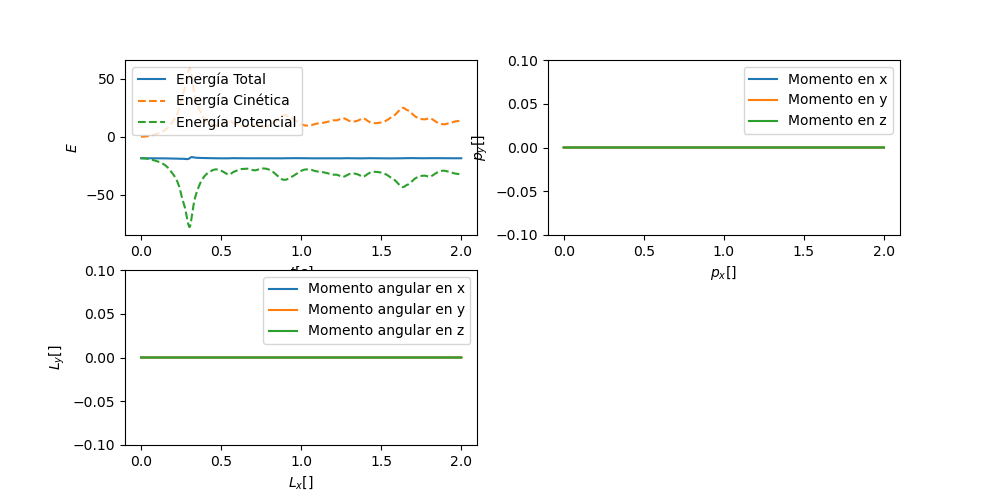

In [18]:
EnergiaK = Particles[0].EkVector
EnergiaP = Particles[0].EpVector
EnergiaTotal = Particles[0].EkVector + Particles[0].EpVector

for i in range(1,len(Particles)):
    EnergiaK = np.add(EnergiaK, Particles[i].EkVector)
    EnergiaP = np.add(EnergiaP, Particles[i].EpVector)
    EnergiaTotal = np.add(EnergiaTotal, Particles[i].EkVector + Particles[i].EpVector) 

Momentum = Particles[0].GetMomentumVector()
AngularMomentum = Particles[0].GetAngularMomentumVector()
for i in range(1,len(Particles)):
    Momentum = np.add(Momentum, Particles[i].GetMomentumVector())   #Momento lineal y angular se conservan por 3ra ley de Newton y por fuerza centra (produce torques que se compensan)
    AngularMomentum = np.add(AngularMomentum, Particles[i].GetAngularMomentumVector())                                                         #Da cero por diseño del programa, debería ser una constante.

fig1 = plt.figure(figsize=(13,9))
ax1 = fig1.add_subplot(2,2,1)
ax2 = fig1.add_subplot(2,2,2)
ax3 = fig1.add_subplot(2,2,3)

ax1.plot(t,EnergiaTotal, label='Energía Total')
ax1.plot(t,EnergiaK,'--',label='Energía Cinética')
ax1.plot(t,EnergiaP,'--',label='Energía Potencial')
ax1.set_xlabel(r'$t[s]$',fontsize=10)
ax1.set_ylabel(r'$E$',fontsize=10)
ax1.legend(loc=0)

#Que la energía total sea negativa significa que el sistema está ligado, si es positiva es libre

ax2.plot(t,Momentum[:,0], label='Momento en x')
ax2.plot(t,Momentum[:,1], label='Momento en y')
ax2.plot(t,Momentum[:,2], label='Momento en z')
ax2.set_xlabel(r'$p_x[]$',fontsize=10)
ax2.set_ylabel(r'$p_y[]$',fontsize=10)
ax2.legend(loc=0)
ax2.set_ylim(-0.1,0.1)

ax3.plot(t,AngularMomentum[:,0], label='Momento angular en x')
ax3.plot(t,AngularMomentum[:,1], label='Momento angular en y')
ax3.plot(t,AngularMomentum[:,2], label='Momento angular en z')
ax3.set_xlabel(r'$L_x[]$',fontsize=10)
ax3.set_ylabel(r'$L_y[]$',fontsize=10)
ax3.legend(loc=0)
ax3.set_ylim(-0.1,0.1)


plt.show()
#plt.savefig('NBodyEnergia.pdf')

In [19]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
    
    Newt = []
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,10)

<IPython.core.display.Javascript object>


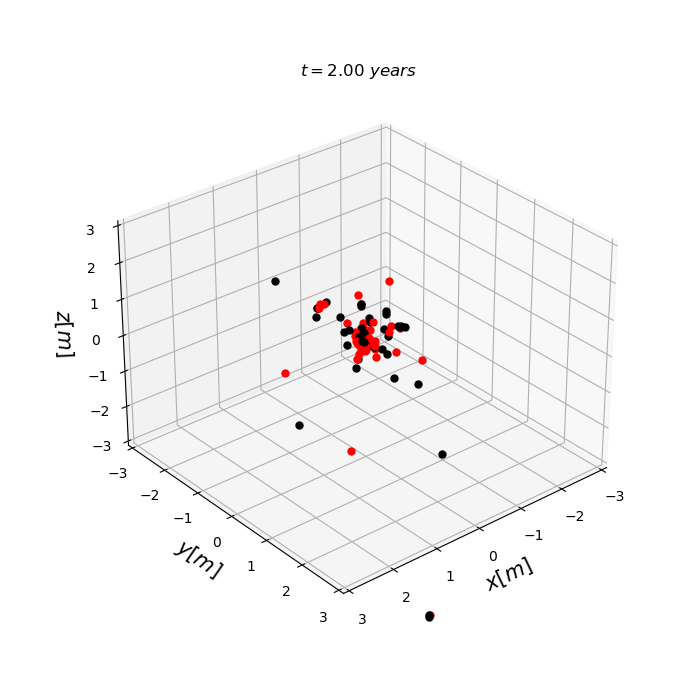

In [20]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)
    
def init():
    ax.set_xlabel(r'$x[m]$',fontsize=15)
    ax.set_ylabel(r'$y[m]$',fontsize=15)
    ax.set_zlabel(r'$z[m]$',fontsize=15)
    ax.set_xlim(-Limits[0]-1,Limits[0]+1)
    ax.set_ylim(-Limits[1]-1,Limits[1]+1)
    ax.set_zlim(-Limits[2]-1,Limits[2]+1)    

def Update(i):
    
    plot = ax.clear()
    init()
    
    j = 0
    
    for p in Particles:
        
        x = p.GetReducePosition()[i,0]
        y = p.GetReducePosition()[i,1]
        z = p.GetReducePosition()[i,2]
        
        vx = p.GetReduceVelocity()[i,0]
        vy = p.GetReduceVelocity()[i,1]
        vz = p.GetReduceVelocity()[i,2]
        
        plot = ax.set_title(r'$t=%.2f \ years$' %(redt[i]))
        
        if j < len(Particles)/2:
        
            plot = ax.scatter(x,y,z,marker='.',color='k',s=100)
        
        else: 
            
            plot = ax.scatter(x,y,z,marker='.',color='r',s=100)
            
        j += 1
            
    return plot
    
Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)
#Animation.save('Galaxia.mp4')

# Punto 4: 4-order simplectic integrator (Yoshida)

In [23]:
TMin, TMax, N = 0.,10., 101
t = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)

t1 = np.arange( TMin - 0.5*h, TMax - 0.5*h + h , h)

def GetA(x):
    return -x

r0 = np.array([1.,0.])
x = np.zeros(N)
v = np.zeros(N)

#Inicializa

x[0] = r0[0]
v[0] = r0[1] - 0.5*h*GetA(x[0])

In [24]:
def GetLeapFrog(x,v,h):
    
    for i in range(1,N):
        
        v[i] = v[i-1] + h*GetA(x[i-1])
        x[i] = x[i-1] + h*v[i]

GetLeapFrog(x,v,h)

In [25]:
X = np.array([])

for i in range(len(x)-1):
    X = np.append(X, 0.5*(x[i] + x[i+1]) )

In [26]:
V = v[1:]
t2 = t1[1:]

E_2 = 0.5*X**2 + 0.5*V**2

In [27]:
TMin, TMax, N = 0.,10., 1001
ty = np.linspace(TMin, TMax, N)
h = (TMax-TMin)/float(N-1)

c1 = 1 / (2*(2-2**(1/3)))
c2 = (1-2**(1/3)) / (2*(2-2**(1/3)))
c3 = c2
c4 = c1
d1 = 1/(2-2**(1/3))
d2 = -1 *2**(1/3) / (2-2**(1/3))
d3 = d1
d4 = 0

r0 = np.array([1.,0.])
xy = np.zeros(N)
vy = np.zeros(N)

xy[0] = r0[0]
vy[0] = r0[1] - 0.5*h*GetA(xy[0])

In [28]:
def Sim4(x,v,h):
    
    for i in range(1,N):
        
        #Pasos intermedios
        
        xa = xy[i-1] + c1*vy[i-1]*h
        va = vy[i-1] + d1*GetA(xa)*h
        xb = xa + c2*va*h
        vb = va + d2*GetA(xb)*h
        xc = xb + c3*vb*h
        vc = vb + d3*GetA(xc)*h    
        
        #Pasos verdaderos
        
        xy[i] = xc + c4*vc*h
        vy[i] = vc        

Sim4(xy,vy,h)

E_4 = 0.5*xy**2 + 0.5*vy**2

<IPython.core.display.Javascript object>


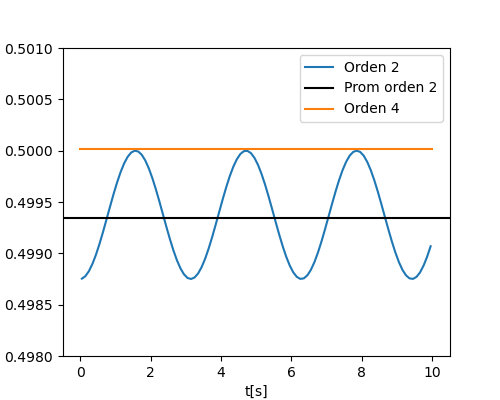

In [29]:
fig0 = plt.figure(figsize=(5,4))
plt.plot(t2,E_2, label='Orden 2')
plt.axhline(np.mean(E_2), label = 'Prom orden 2', c='k')
plt.plot(ty,E_4, label='Orden 4')
plt.legend(loc=1)
plt.ylim(0.4980, 0.5010)
plt.xlabel('t[s]')
plt.ylabel('E[J]')
plt.show()

<IPython.core.display.Javascript object>


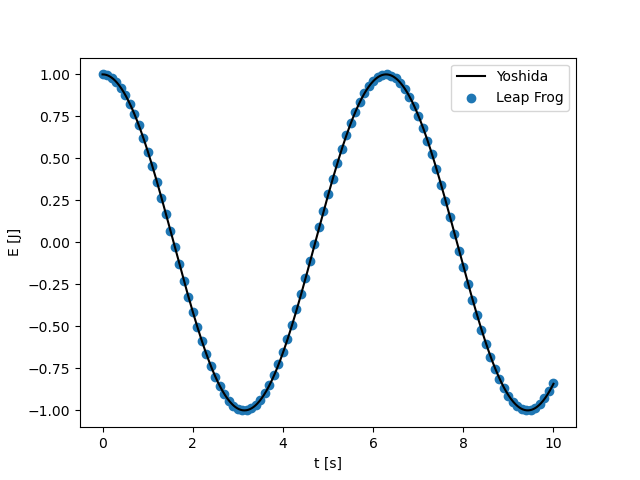

In [30]:
plt.figure()
plt.scatter(t,x, label = 'Leap Frog')
plt.plot(ty,xy, label = 'Yoshida', c='k')
plt.xlabel('t [s]')
plt.ylabel('E [J]')
plt.legend()